# Study of Income Correlated variables based on Panel Study of Income Dynamics(PSID) data from 1992 to 2012
## Content
- [Introduction](#Introduction)
- [Data Cleanning Based on Distribution Analysis](#Data-Cleanning-Based-on-Distribution-Analysis)
- [Correlation Analysis Based on Scatter Plot and Linear Regression](#Correlation-Analysis-Based-on-Scatter-Plot-and-Linear-Regression)
- [Engels Coefficient Analysis](#Engels-Coefficient-Analysis)
- [Gini Coefficient Analysis](#Gini-Coefficient-Analysis)

## Introduction

In the final project, we investigate the correlation between household-level income and our selected income shocks (interesed varaibles) separately by our cleaning PSID(Panel Study of Income Dynamics) data. In particular, we've done a lot of work in cleaning PSID raw data with R in the beginning, and explore the correlation base on the scatter plot and linear regression of PSID cleaning data. Moreover, we verify the Engels coefficient analysis and Gini coefficient analysis with our cleaning data.

As future steps after midterm report, we propose to try several models（eg. linear regression）to fit the relationship between household-level income and income shocks based on our observation. Then, we will split PSID data into three parts: testing data, cross-validation data, and training data based on years.We will predict the household-level income scale and the growth of household-level income with PSID testing data(2010 & 2012) and also evaluate how well our model predict the new data.


## Data Cleanning Based on Distribution Analysis
It is important to clean data before we start to do actual analysis on it. To be specific, we first select variables that we are interested in and then do data cleaning for the selected variables one by one.

### Selecting Interesting Variables
In this section, we import necessary libraries, read raw data from csv, select data that happens after 1992. We do this selection based on year because we want to focus on data that happens not too far away. Then we select the following interesting variables that we think is closely related to one’s income.

1. house: the price of one's house
2. year: the year to conduct survey
3. rent: annual rent of a family
4. food: the money spent eating at home
5. fout: the money spent eating outside
6. hhelp: the amount of help received from the relatives/friends of the husband of this family
7. whelp: the amount of help received from the relatives/friends of the husband of this family
8. marit: marital status
9. educ: education year
10. kids: number of kids a family has
11. race: race 
12. y: total annual income of a family

In [3]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn # or alternatively plt.style.use('ggplot') for a similar look

matplotlib.rc("figure", figsize=(8,6))
matplotlib.rc("axes", labelsize=16, titlesize=16)
matplotlib.rc("xtick", labelsize=14)
matplotlib.rc("ytick", labelsize=14)
matplotlib.rc("legend", fontsize=14)
matplotlib.rc("font", size=14)

In [4]:
# read data
df = pd.read_csv('data_1968_2013_Updated.csv')

# focus on recent data
data = df[df['year']>=1992].sort_values(by=['year'])

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,8,9,35,36,40,41,45,46,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# get basic information of data
print data.head()
print data.dtypes

        person  seo  year    id  pid    house  rent util     food fstmp  \
261527     641    0  1992     1    1      0.0     0    .        0     0   
20855     8615    0  1992  7341    1  90000.0     0    .  5199896     0   
115304   21823    1  1992  4021    1      0.0  2928    .     3120  1392   
115343   18943    1  1992  4020    1  70000.0     0    .     3120     0   
20843     3799    0  1992  7342    1  28000.0     0    .  5199896     0   

         ...    asset  trhf     trhw  hhelp  ohelp  unionj  unioni  whelp  \
261527   ...      310            0.0      0      0       5       0      0   
20855    ...        0            0.0      0      0       5       0      0   
115304   ...        0            0.0      0      0       1       1      0   
115343   ...        0        21600.0      0      0       0       0      0   
20843    ...        0            0.0      0      0       0       0      0   

        truncy  trunca  
261527       0       0  
20855        0       0  
115304     

In [6]:
# select interesting variables
data = data[['id','person','year','house','rent','food','fout','hhelp','whelp','marit','educ','kids','race', 'y']]
data['income']= data['y']
del data['y']
print data.columns.values

['id' 'person' 'year' 'house' 'rent' 'food' 'fout' 'hhelp' 'whelp' 'marit'
 'educ' 'kids' 'race' 'income']


In [7]:
# remove . and space in data
data = data.replace('', np.nan)
data = data.replace('.', np.nan)
data = data.dropna(how = "any")

### Data Cleaning for Interesting Variables
Having selected interesting variables, we clean the values for them one by one. Generally speaking three aspects are involved here. 
1. Type conversion, where it is necessary to convert string to integer or float. 
2. Outlier(abnormal value) removal. We adopt the hist graph to detect outliers and abnormal values, and remove a row if this row contains at least one abnormal value. 
3. Convert other useful values to the log scale of some original value.

In each of the following code cells we marked clearly what is the variable we are cleaning and why we are removing some values. Please refer to the code, comments, and hist graphs for details. 

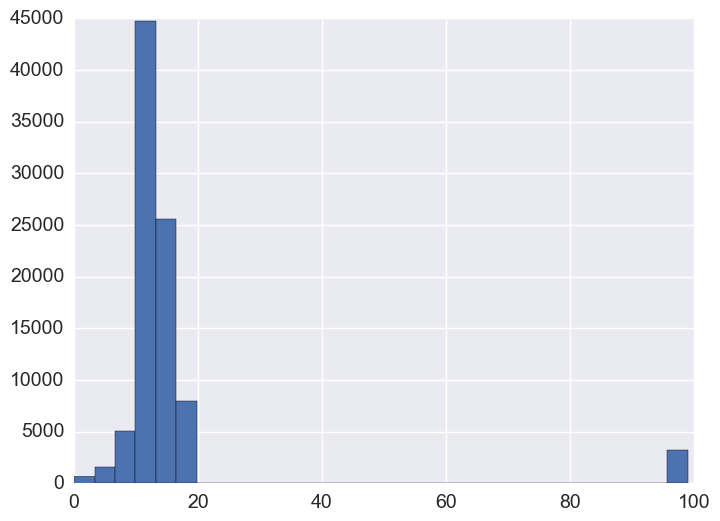

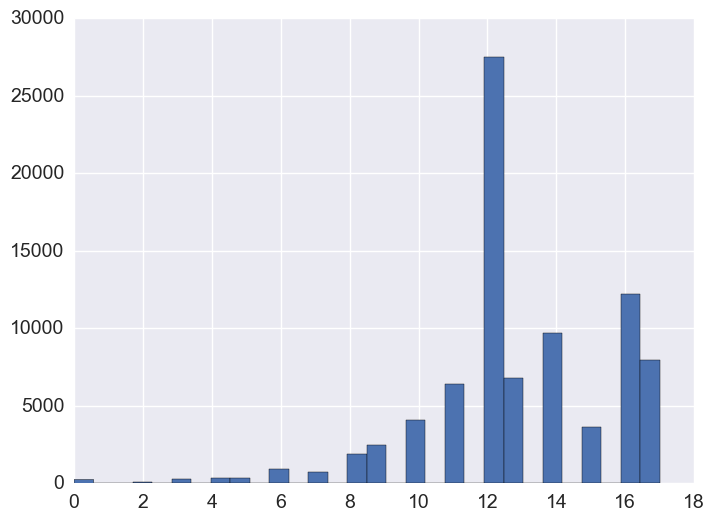

In [8]:
# clean education
plt.figure(0)
data['educ'].hist(bins = 30) #education distribution before cleaning

data = data[data['educ'] != 99]
plt.figure(1)
data['educ'].hist(bins = 30) #education distribution after cleaning

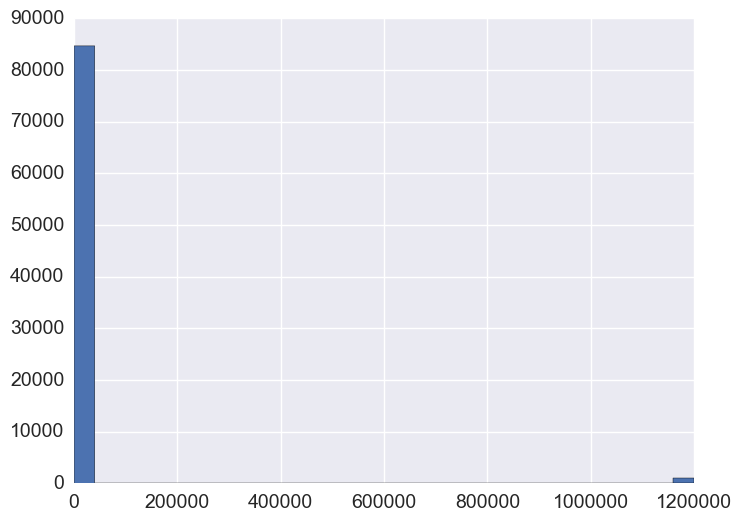

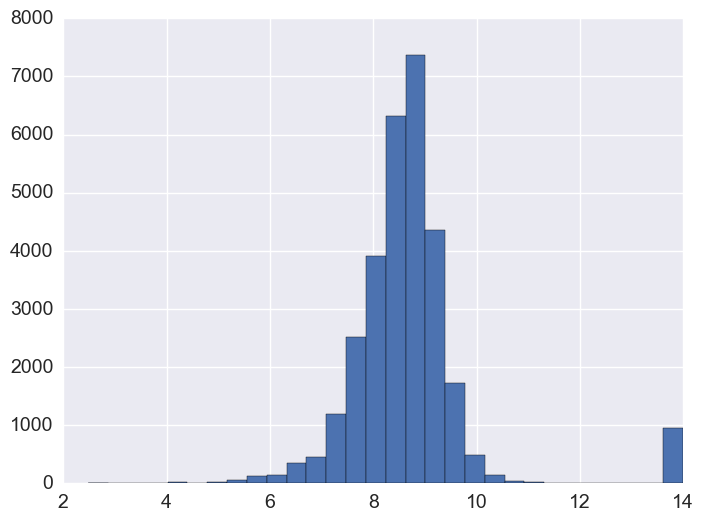

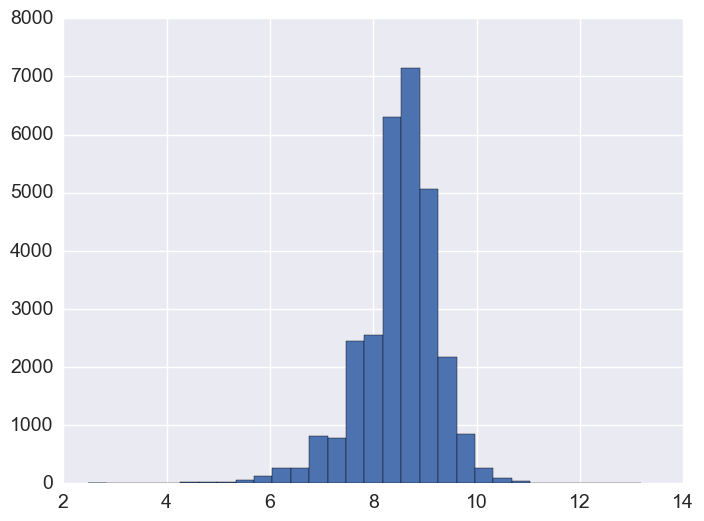

In [9]:
# clean rent: find outliers
plt.figure(0)
data['rent'] = data['rent'].astype(float) 
data['rent'].hist(bins = 30) #from this plot we start to use log scale

plt.figure(1)
rent = data['rent']
log_rent = rent[rent > 0].map(lambda x : math.log(x))
log_rent.hist(bins = 30) # rent distribution before cleaning
#print log_rent[log_rent>12]

data = data[data['rent'] < 1000000] # clean data

plt.figure(2)
rent = data['rent']
log_rent = rent[rent > 0].map(lambda x : math.log(x))
log_rent.hist(bins = 30) # rent distribution after cleaning

The above plot shows an interesting distribution of the rents among all the data. The people who have houses have a rent value 0, which should be ignored at this plot. However, the rest of the histogram shows that a small portion of families have a much higher rent 

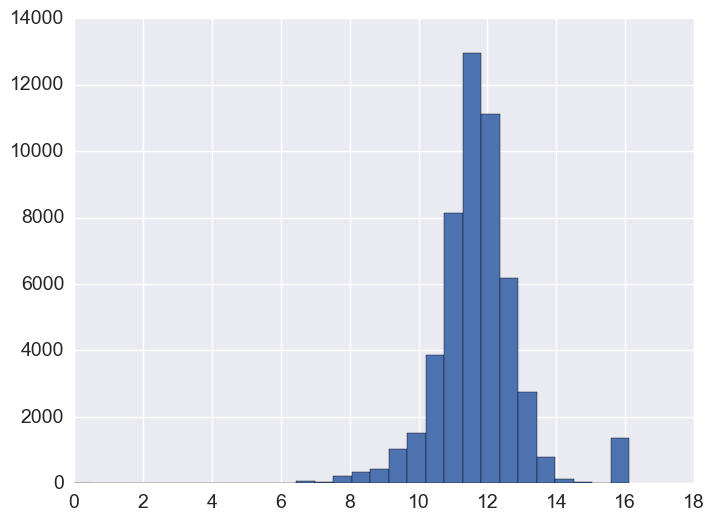

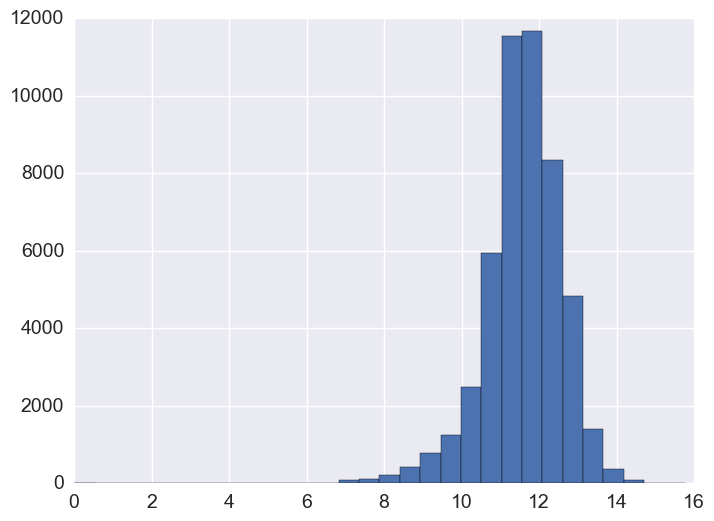

In [10]:
# clean house
plt.figure(0)
house = data['house']
log_house = house[house > 0].map(lambda x : math.log(x))
#print house[house > 8e6].head
log_house.hist(bins = 30) # house value distribution before cleaning

data = data[data['house'] < 8e6]

plt.figure(1)
house = data['house']
log_house = house[house > 0].map(lambda x : math.log(x))
log_house.hist(bins = 30) # house value distribution after cleaning

20855    5199896.0
20843    5199896.0
20831    5199896.0
20817    5199896.0
20730    5199896.0
Name: food, dtype: float64
20855    5199896.0
20843    5199896.0
20831    5199896.0
20817    5199896.0
20730    5199896.0
Name: food, dtype: float64


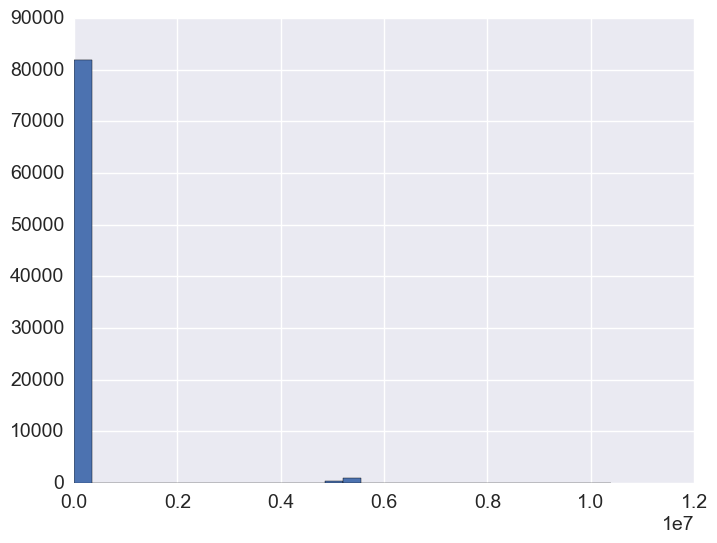

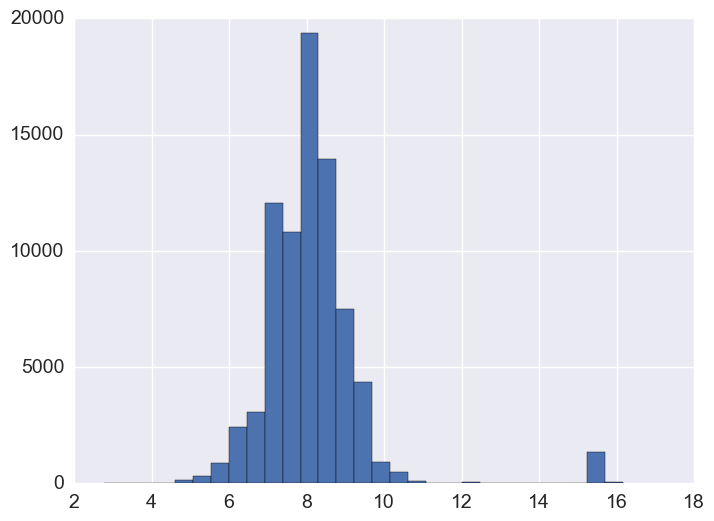

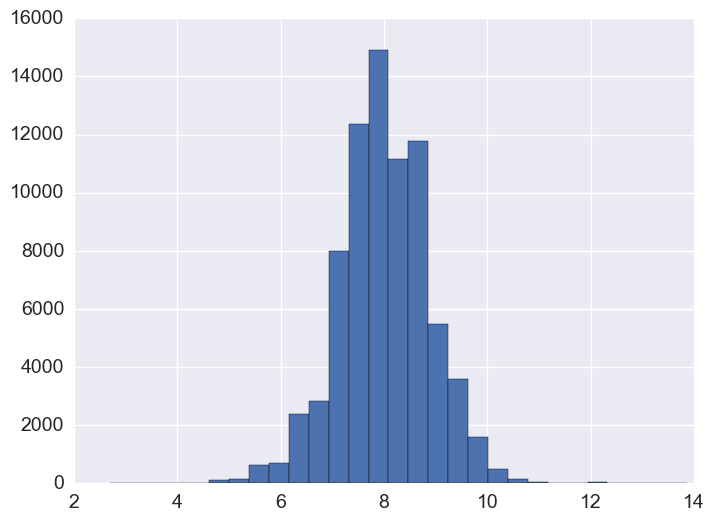

In [11]:
# clean food
data['food']= data['food'].astype(float)
plt.figure(0)
food = data['food']
print food[food > 1e6].head()
# Because all the food consumption are distinct, we assume they are reasonble large data.

food.hist(bins = 30) # food distribution before cleaning
log_food = food[food > 0].map(lambda x : math.log(x))
plt.figure(1)
log_food.hist(bins = 30) # food distribution after log scale
print food[food>math.exp(14)].head()
data = data[data['food']<math.exp(14)]
food = data['food']
log_food = food[food > 0].map(lambda x : math.log(x))
plt.figure(2)
log_food.hist(bins = 30) # food distribution after log scale

22476    1199976.0
23594    1199976.0
28792    1199988.0
25639    1199976.0
34656    1199976.0
Name: fout, dtype: float64


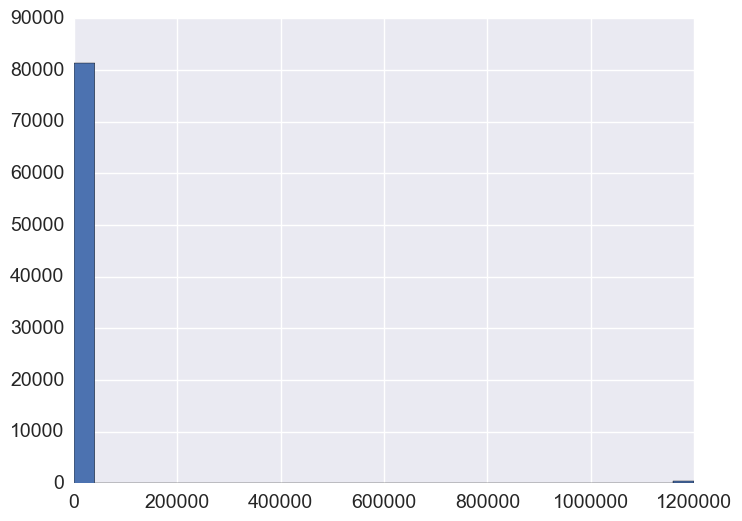

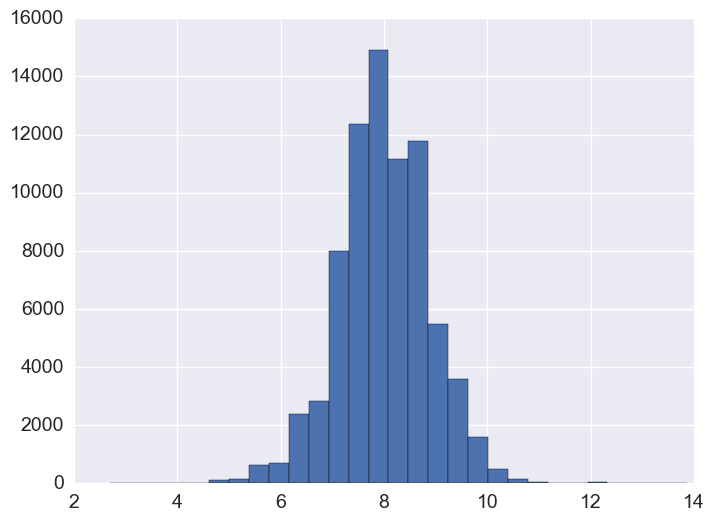

In [12]:
# clean fout(cost of delivered food)
data['fout'] = data['fout'].astype(float)
plt.figure(0)
fout = data['fout']
print fout[fout > 1e6].head()
# Because all the food consumption are almost the same, we assume they are not reasonble large data.

fout.hist(bins = 30) # fout distribution before cleaning
data = data[data['fout'] < 1e6]
fout = data['fout']
log_fout = fout[fout > 0].map(lambda x : math.log(x))
plt.figure(1)
log_food.hist(bins = 30) # food distribution after log scale

52577     999999.0
209254    999998.0
52927     999999.0
79797     999998.0
27435     999999.0
Name: hhelp, dtype: float64
25742     99998.0
119213    99998.0
149634    99999.0
113689    99998.0
109428    99998.0
Name: hhelp, dtype: float64


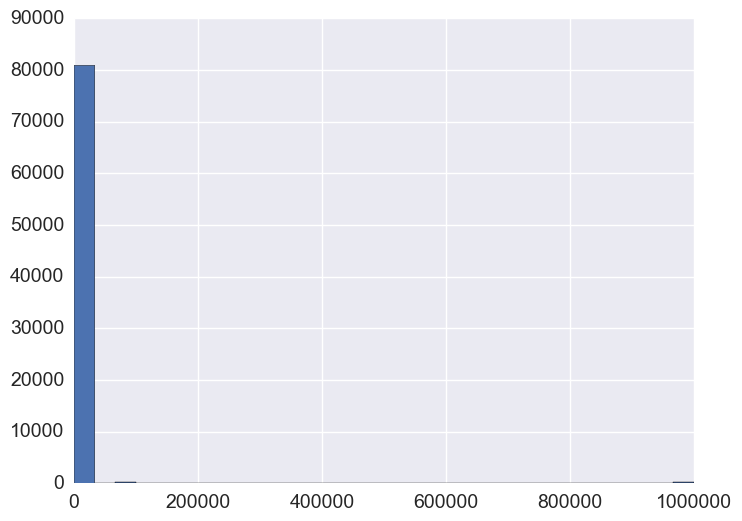

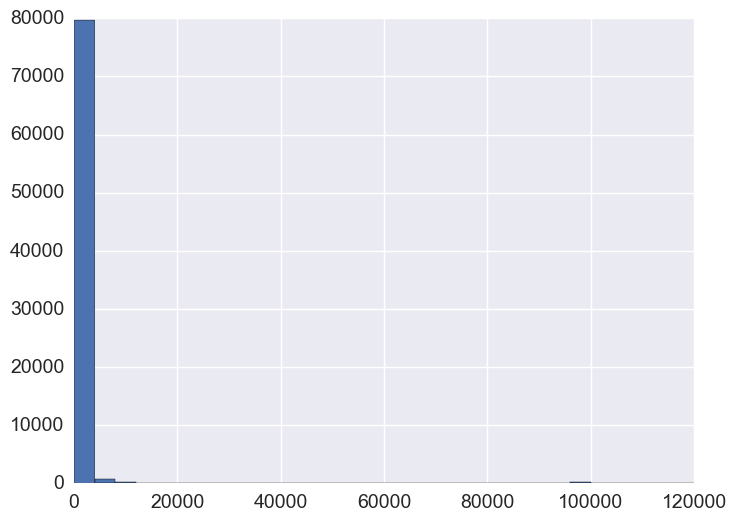

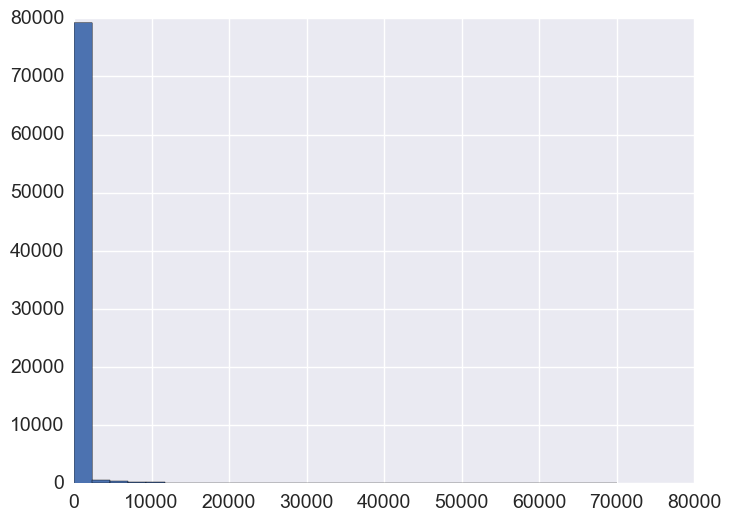

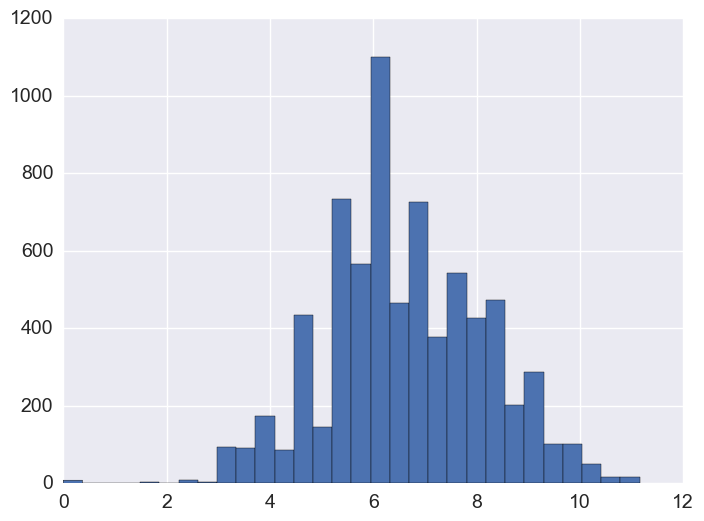

In [13]:
# clean hhelp(get help from husband)
data['hhelp'] = data['hhelp'].astype(float)
plt.figure(0)
hhelp = data['hhelp']
print hhelp[hhelp > 8e5].head()
# Because all the food consumption are almost the same, we assume they are not reasonble large data.

hhelp.hist(bins = 30) # hhelp distribution before cleaning
data = data[data['hhelp'] < 8e5]
plt.figure(1)
hhelp = data['hhelp']
hhelp.hist(bins = 30) # hhelp distribution after 1st cleaning
print hhelp[hhelp > 8e4].head()
# Because all the food consumption are almost the same, we assume they are not reasonble large data.
data = data[data['hhelp'] < 8e4]
plt.figure(2)
hhelp = data['hhelp']
hhelp.hist(bins = 30) # hhelp distribution after 2nd cleaning
log_hhelp = hhelp[hhelp > 0].map(lambda x : math.log(x))
plt.figure(3)
log_hhelp.hist(bins = 30) # hhelp distribution after log scale

224933    999999.0
35878     999998.0
64345     999998.0
155769    999998.0
117733    999999.0
Name: whelp, dtype: float64
173896    99998.0
89947     99999.0
43682     99999.0
200200    99999.0
50241     99999.0
Name: whelp, dtype: float64
32566     40000.0
162895    40000.0
31320     40000.0
30683     54217.0
157089    80000.0
Name: whelp, dtype: float64


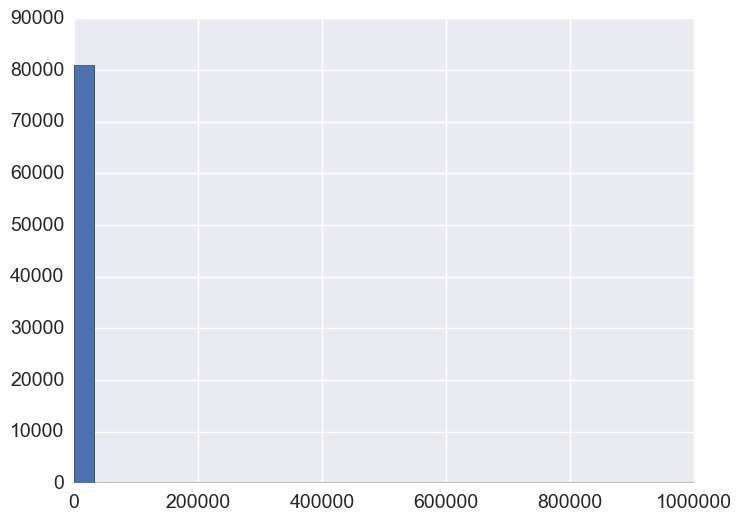

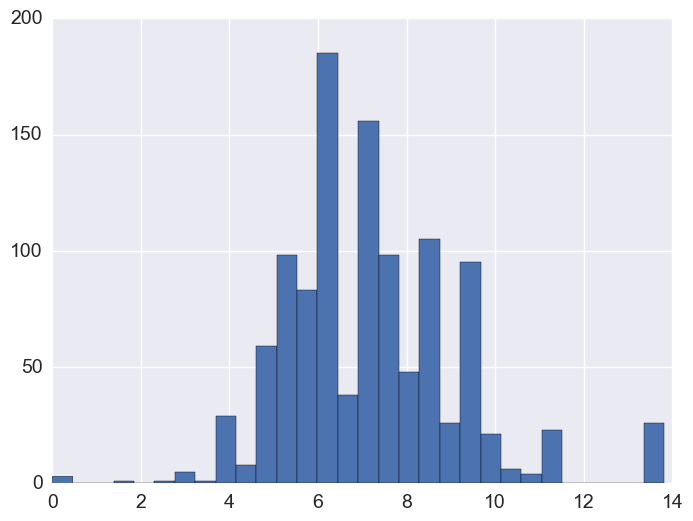

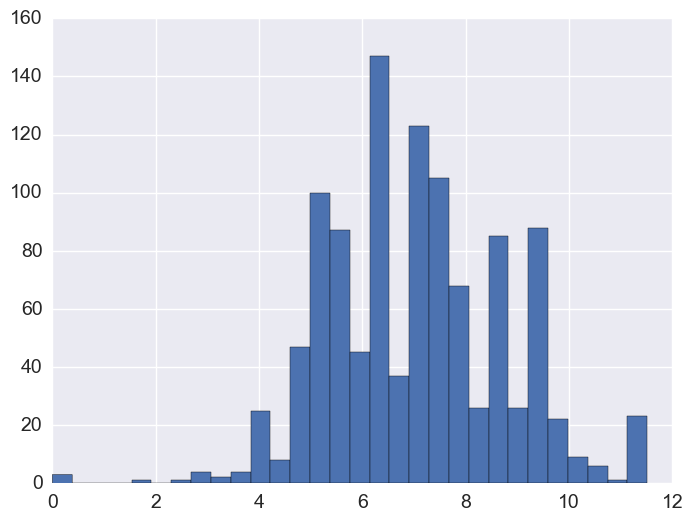

In [14]:
# clean whelp(get help from wife)
data['whelp'] = data['whelp'].astype(float)
plt.figure(0)
whelp = data['whelp']
whelp.hist(bins = 30) # whelp distribution before cleaning

log_whelp = whelp[whelp > 0].map(lambda x : math.log(x))
plt.figure(1)
log_whelp.hist(bins = 30) # whelp distribution after log scale
print whelp[whelp > math.exp(12)].head()
data = data[data['whelp'] < math.exp(12)]
whelp = data['whelp']
log_whelp = whelp[whelp > 0].map(lambda x : math.log(x))
plt.figure(2)
log_whelp.hist(bins = 30) # whelp distribution after log scale
print whelp.sort_values().tail() # Because all the whelp are almost the same, we assume they are not reasonble large data.
whelp = whelp[whelp < 99998]
print whelp.sort_values().tail() # Because all the whelp are distinct, we assume they are not reasonble large data.
data = data[data['whelp'] < 99998]

count    80872.000000
mean         0.851420
std          1.170414
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         11.000000
Name: kids, dtype: float64

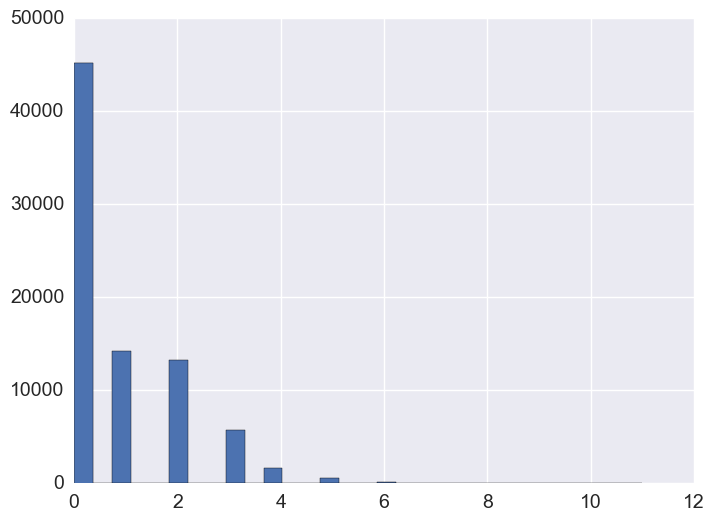

In [15]:
# clean kids
kids = data['kids']
plt.figure(0)
kids.hist(bins = 30)
kids.describe() #looks good, does not need clean

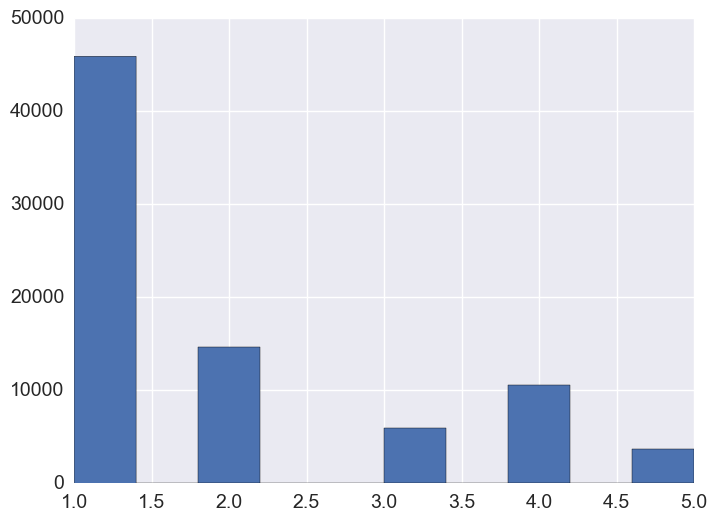

In [17]:
# clean marit
# Codes for marital status
# 1. Married or permanently cohabiting; wife, "wife," or husband is present in the FU
# 2. Single, never legally married and no wife, "wife," or husband is present in the FU
# 3. Widowed and no wife, "wife," or husband is present in the FU
# 4. Divorced and no wife, "wife," or husband is present in the FU
# 5. Separated; legally married but no wife, "wife," or husband is present in the FU (the spouse may be in an institution)

# (cited from PSID code book)
marit = data['marit']
marit.hist(bins = 10) #looks good, does not need clean

239717    1.0
32987     1.0
224089    1.0
195418    1.0
83706     1.0
Name: income, dtype: float64


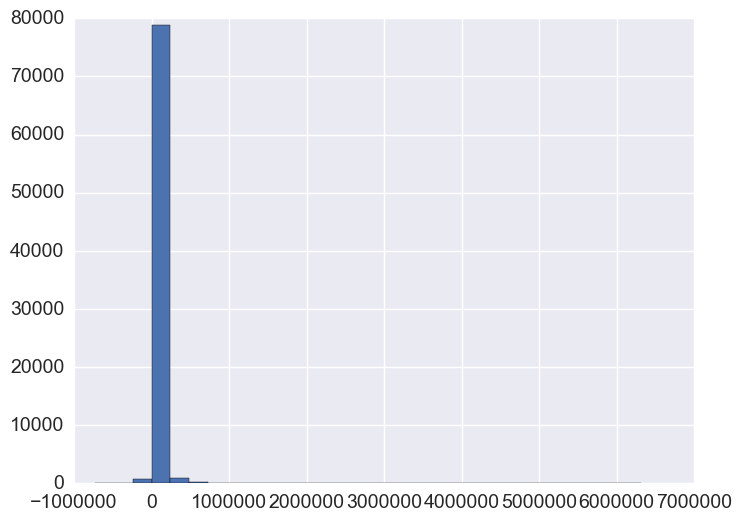

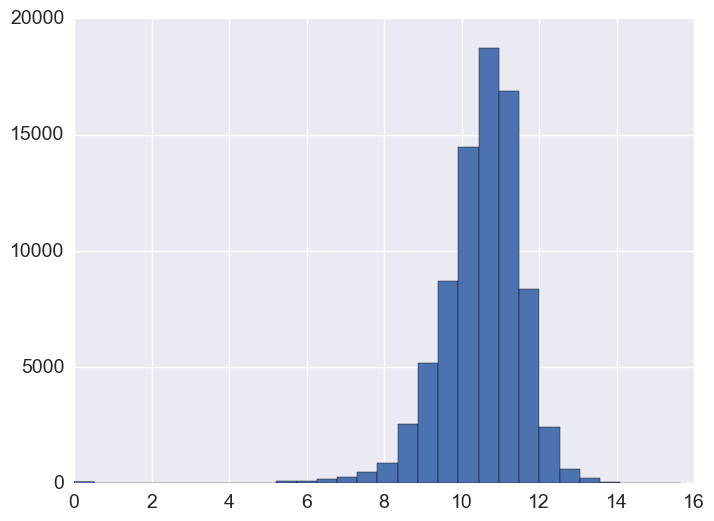

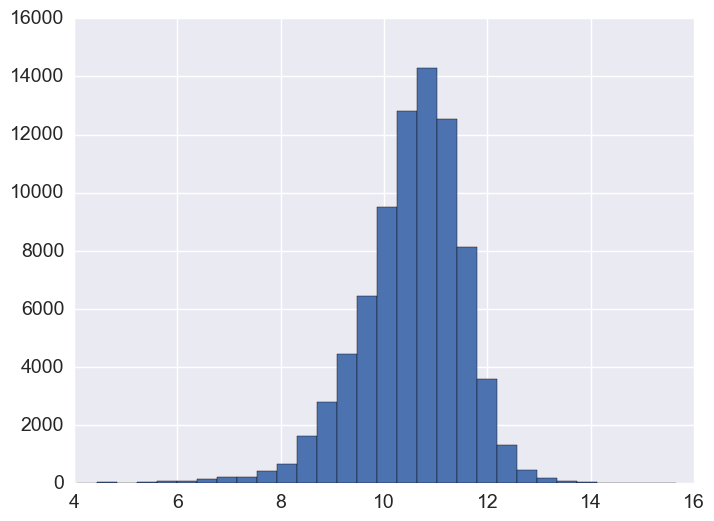

In [18]:
# clean income
income = data['income']
plt.figure(0)
income.hist(bins = 30)
#print income[income>6e6].head()
log_income = income[income > 0].map(lambda x : math.log(x))
plt.figure(1)
log_income.hist(bins = 30) # whelp distribution after log scale
print income[income>0].sort_values().head()
data = data [data['income']>math.exp(4)]
income = data['income']
log_income = income[income > 0].map(lambda x : math.log(x))
plt.figure(2)
log_income.hist(bins = 30) # whelp distribution after log scale

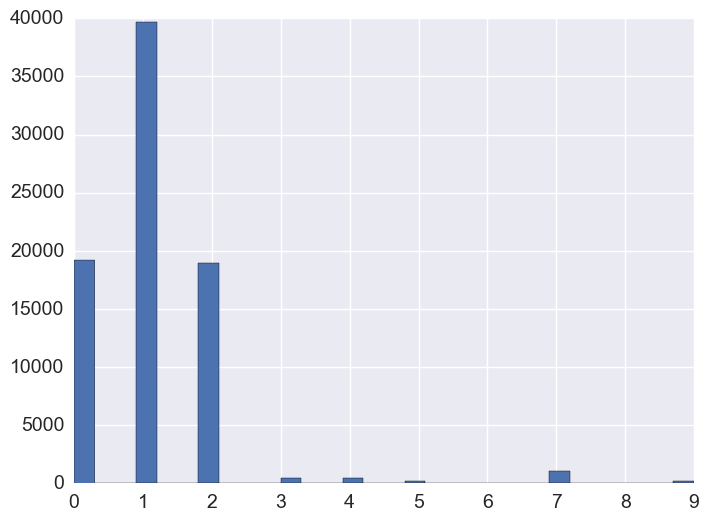

In [19]:
# clean race
race = data['race']
plt.figure(0)
race.hist(bins = 30) #looks good, do not need to clean

<a class="anchor" id="Correlation-Analysis-Based-on-Scatter-Plot-and-Linear-Regression"></a>
## Correlation Analysis Based on Scatter Plot and Correlation

From the observation of income and food columns and intuition, we started by looking at plain scatter plots.
### Income vs Food

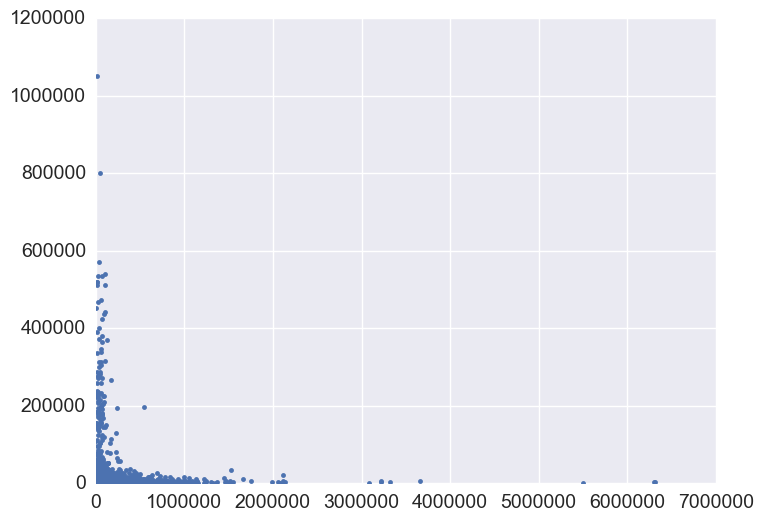

In [20]:
plt.plot(data['income'],data['food'],'.')

### Log(Income) vs Log(Food)
The plain scatter plot is not friendly to visualize. So we decide to get the logs of both income and food consumptions.
#### Correlation Comparison: Log(Income) vs Log(Food_at_home) and Log(Income) vs Log(Food_out)

            log_food  log_income
log_food    1.000000    0.035374
log_income  0.035374    1.000000
            log_fout  log_income
log_fout    1.000000    0.483423
log_income  0.483423    1.000000


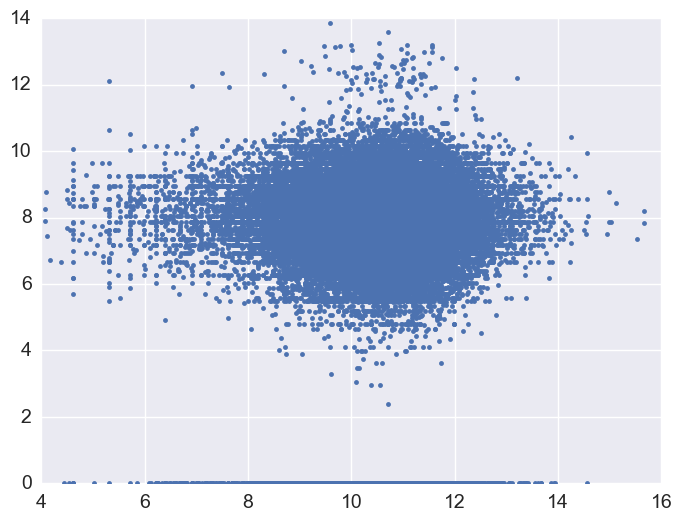

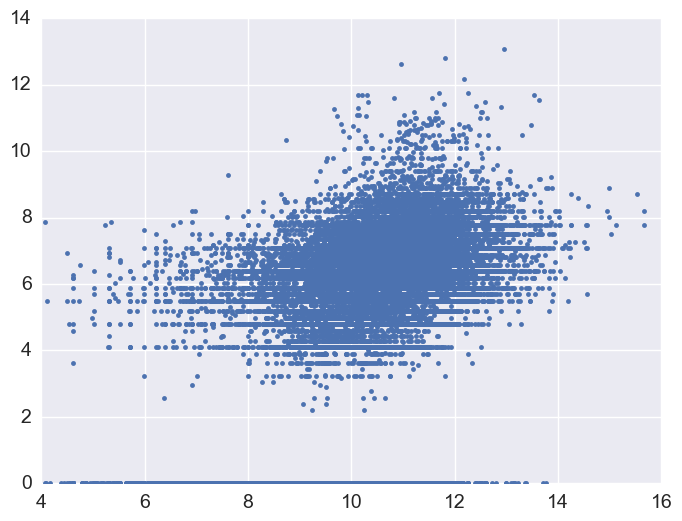

In [21]:
data['log_income'] = data['income'].map(lambda x : math.log(x))
data['log_food'] = data['food'].map(lambda x : math.log(x+1))
data['log_fout'] = data['fout'].map(lambda x : math.log(x+1))
plt.figure(0)
plt.plot(data['log_income'],data['log_food'],'.')
#corr_pd = pd.DataFrame(data['income','food'])
print data[['log_food','log_income']].corr()

print data[['log_fout','log_income']].corr()
plt.figure(1)
plt.plot(data['log_income'],data['log_fout'],'.')
plt.show()

<a class="anchor" id="Engels Coefficient Analysis"></a>
## Engels Coefficient Analysis
Engel's law is an observation in economics stating that as income rises, the proportion of income spent on food falls, even if actual expenditure on food rises. In other words, the income elasticity of demand of food is between 0 and 1.


<img src='engels.png'>

One application of this statistic is treating it as a reflection of the living standard of a country. As this proportion or "Engel coefficient" increases, the country is by nature poorer, conversely a low Engel coefficient indicates a higher standard of living.

(Cited from Wikipedia)

### Engel coefficient vs log scale income
Following plot shows a general observation that people with higher income tends to have lower engel coeffcient (spending less proportion of income on food consumption). It agrees with economics intuition.

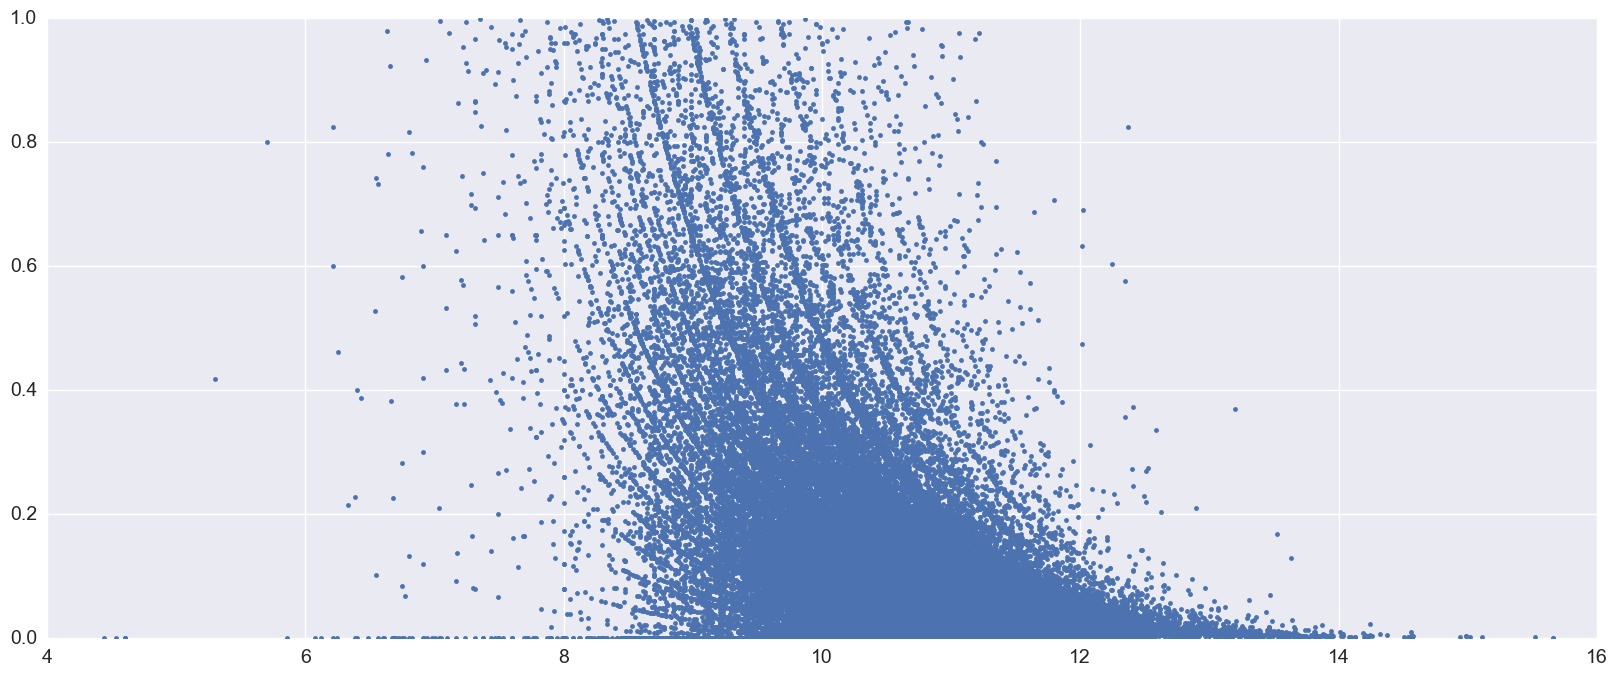

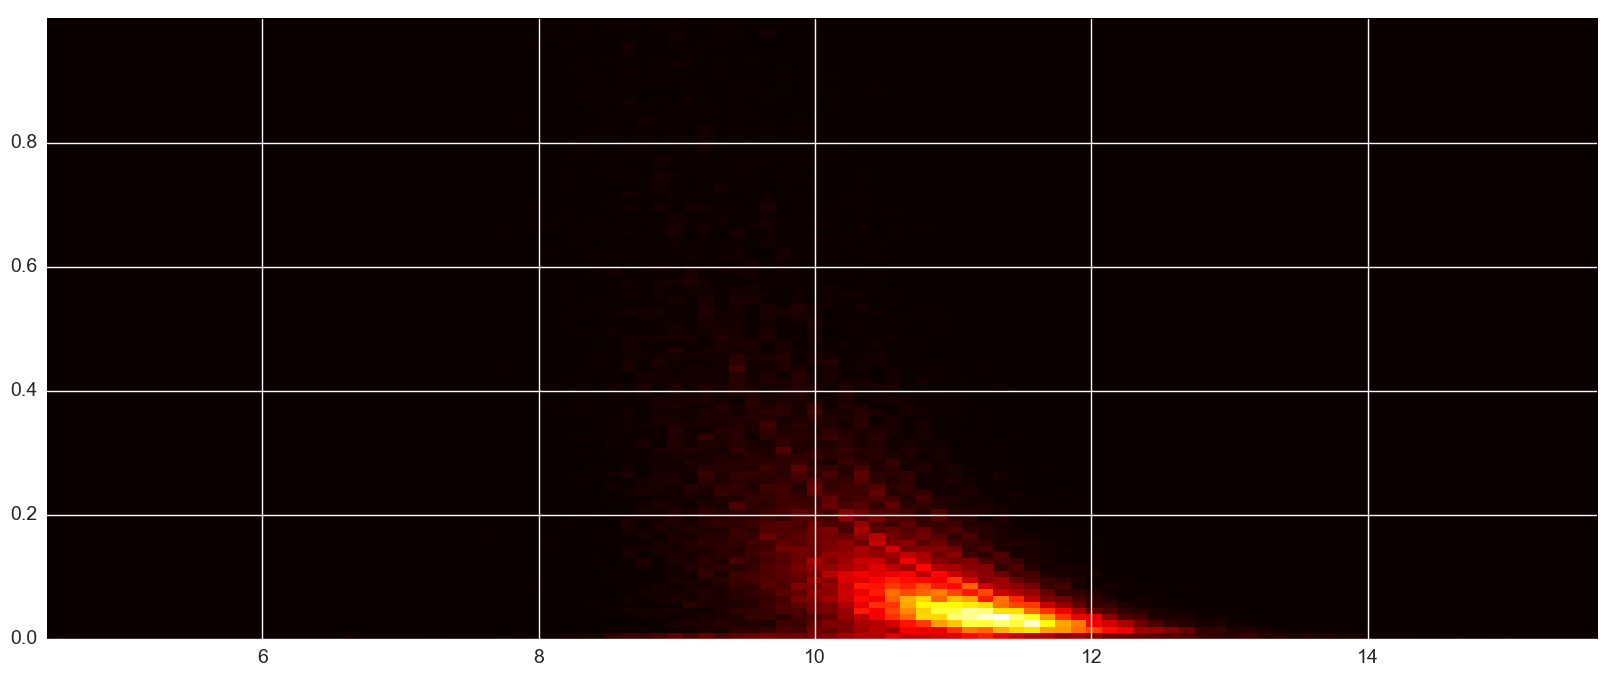

In [22]:
data_engels = data.copy(deep=True)
data_engels =data_engels[data_engels['income']>0]
data_engels = data_engels[data_engels['food']+data_engels['fout']<data_engels['income']]
def f(x):
    return float(x['fout']+x['food'])/x['income']
Engels = data_engels.apply(f, axis=1)
data_engels['log_income'] = data_engels['income'].map(lambda x : math.log(x))
plt.figure(0)
plt.figure(figsize=(20,8))
plt.plot(data_engels['log_income'],Engels,'.')
plt.figure(1)
plt.figure(figsize=(20,8))
plt.hist2d(data_engels['log_income'],Engels, bins=100);
plt.set_cmap(plt.cm.get_cmap('hot'))

<a class="anchor" id="Gini Coefficient Analysis"></a>
## Gini Coefficient Analysis
We started by looking at the whisk box charts of the income distributions from 1992 to 2012 (The survey data is collected once per two years). The log_income slightly went up and the middle part (height of the box) remained almost the same. We could not conclude too much on the distribution of income and its changes.

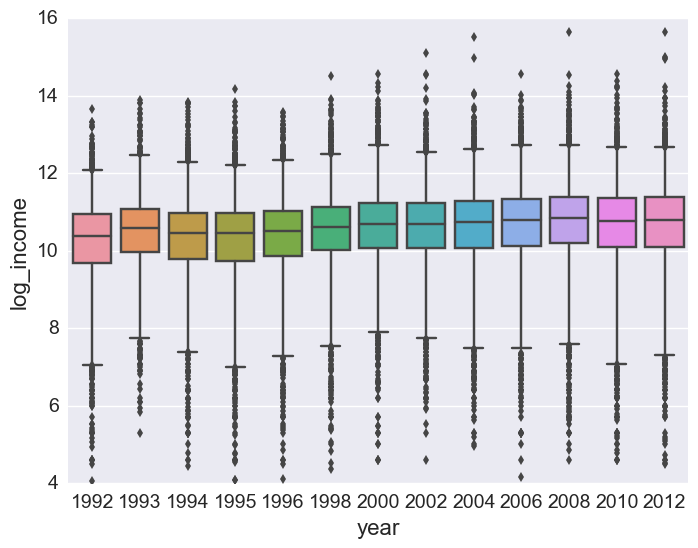

In [23]:
ax = seaborn.boxplot(x="year", y="log_income", data=data,whis=[1,99], showfliers=True)

### Concept of Gini Coefficient
To make more sense of how the income distribution changes, we introduce the concept of "Gini Coefficient".
The Gini Coefficient is one way to measure how evenly the income (or wealth) is distributed throughout a country.

The Gini Coefficient is calculated as follows. We find out the income of all the people in a country and then express this information as a cumulative percentage of people against the cumulative share of income earned. This gives us a Lorenz Curve which typically looks something like the following

<img src="Gini_coefficient.gif">

In plain English, the graph above indicates the proportion of the income going to the poorest people, middle-income people and richest people.

<img src="gini.gif">

Cited from: http://www.intmath.com/blog/mathematics/the-gini-coefficient-of-wealth-distribution-4187

### Calculation of Gini Coefficient from 1992 to 2012

Applying the gini functions to the year grouped data, we found the Gini Coefficient is increasing mostly during the last twenty years, which means the inequality of income is getting worse and worse.

[1992, 1993, 1994, 1995, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012]
year
1992    0.442781
1993    0.444809
1994    0.455946
1995    0.452254
1996    0.445988
1998    0.450058
2000    0.465286
2002    0.454114
2004    0.463536
2006    0.463151
2008    0.468143
2010    0.469139
2012    0.482060
Name: income, dtype: float64


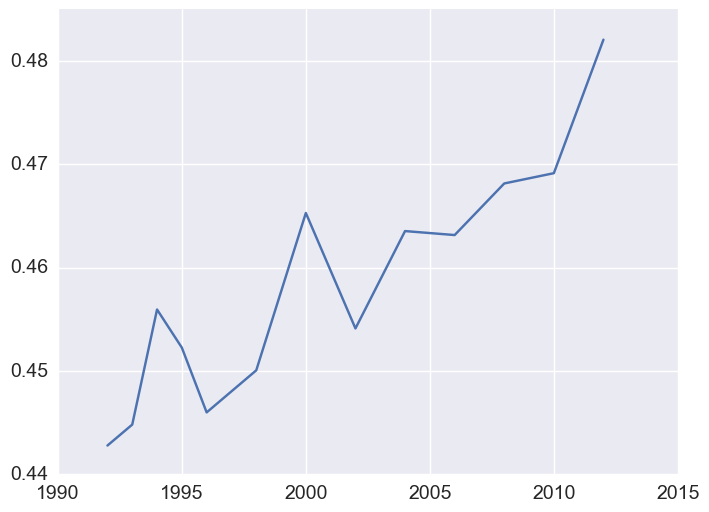

In [24]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area
# Cited from: http://planspace.org/2013/06/21/how-to-calculate-gini-coefficient-from-raw-data-in-python/
#print gini(data[data['year']==1992.0]['income'])
data_gini = data.copy(deep=True)
gini = data_gini.groupby("year").income.apply(gini)
print data_gini['year'].unique().tolist()
print gini
plt.plot(data_gini['year'].unique().tolist(),gini,'-')